In [1]:
import sys
sys.path.insert(0, "../")

from flatland.envs.rail_generators import custom_rail_generator
from flatland.envs.line_generators import custom_line_generator
from flatland.envs.malfunction_generators import ParamMalfunctionGen
from flatland.envs.rail_env import RailEnv
from flatland.envs.observations import GlobalObsForRailEnv

test_env = RailEnv(
    width=80,
    height=27,
    number_of_agents=50,
    rail_generator=custom_rail_generator(),
    line_generator=custom_line_generator(),
    malfunction_generator=ParamMalfunctionGen((0,0,0)),
    obs_builder_object=GlobalObsForRailEnv()
)

# Call reset() to initialize the environment
observation, info = test_env.reset()

In [4]:
import PIL
from flatland.utils.rendertools import RenderTool
from IPython.display import clear_output
from flatland.envs.controllers import ConstantGoForwardController
from flatland.envs.controllers import RandomController
from flatland.envs.controllers import ShortestPathController
from flatland.envs.controllers import BlockPathController
from flatland.envs.controllers import RHSController
from flatland.envs.controllers import RHSandClusterController


def render_env(env, renderer, wait=True):
    
    env_renderer = renderer
    env_renderer.render_env()

    image = env_renderer.get_image()
    pil_image = PIL.Image.fromarray(image)
    clear_output(wait=True)
    display(pil_image)
    
def run_episode(env):
    observations, info = env.reset()
    renderer = RenderTool(env, gl="PILSVG")
    #controller = ConstantGoForwardController()
    #controller = RandomController(test_env.action_space[0])
    #controller = ShortestPathController(test_env)
    #controller = BlockPathController(test_env)
    #controller = RHSController(test_env)
    controller = RHSandClusterController(test_env)

    score = 0
    actions = dict()

    for step in range(700):

        actions = controller.act(observations, env)
        next_observations, all_rewards, dones, info = env.step(actions)
        observations = next_observations
        for agent_handle in env.get_agent_handles():
            score += all_rewards[agent_handle]
            
        render_env(env, renderer)
        print('Timestep {}, total score = {}'.format(step, score))

        if dones['__all__']:
            print('All done! It took {} timesteps and the final score was {}.'.format(step, score))
            return

    print("Episode didn't finish after 700 timesteps. The final score was {}.".format(score))

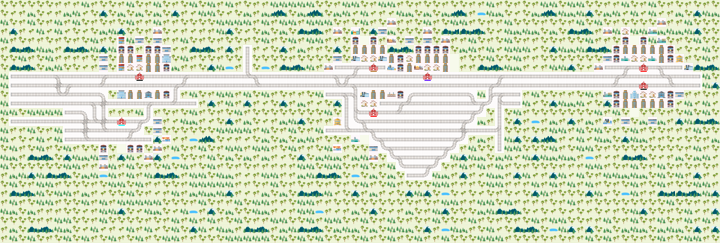

Timestep 696, total score = -508.0
All done! It took 696 timesteps and the final score was -508.0.


In [6]:
run_episode(test_env)